# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\danie\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
from newsapi import NewsApiClient

load_dotenv()

news_api_key = os.getenv("NEWS_API_KEY")

# check that we have the newsapi api key without displaying it
len(news_api_key) > 0

True

In [3]:
# Create a newsapi client
# YOUR CODE HERE!
news_api = NewsApiClient(api_key=news_api_key)

In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!

# use get_everything from newsapi/NewApiClient to query all articles with "bitcoin" and "btc" (english)
bitcoin_articles = news_api.get_everything(q='bitcoin AND btc',
                                           language='en',
                                           sort_by='popularity',
                                           page_size=100
                                          )

# spot check bitcoin_articles 'totalResults' value and first 2 articles
bitcoin_articles['totalResults'], bitcoin_articles['articles'][:2]

(1322,
 [{'source': {'id': None, 'name': 'Gizmodo.com'},
   'author': 'John Biggs',
   'title': 'This Ransomware Stole $25 Million in 5 Months',
   'description': 'A ransomware variant called NetWalker is doing surprisingly well, even in this economy. The malware, which takes computers hostage and asks for a Bitcoin ransom, raked in $25 million in the last five months, a solid haul for what amounts to a solid ransomware…',
   'url': 'https://gizmodo.com/this-ransomware-stole-25-million-in-5-months-1844609509',
   'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/xpts6nwwp4jgsoqmmryt.jpg',
   'publishedAt': '2020-08-04T20:30:00Z',
   'content': 'A ransomware variant called NetWalker is doing surprisingly well, even in this economy. The malware, which takes computers hostage and asks for a Bitcoin ransom, raked in $25 million in the last five… [+1606 chars]'},
  {'source': {'id': 'reuters', 'name': 'Reuters'},
  

In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!

# use get_everything from newsapi/NewApiClient to query all articles with "ethereum" (english)
ethereum_articles = news_api.get_everything(q='ethereum',
                                            language='en',
                                            sort_by='popularity',
                                            page_size=100
                                           )

# spot check ethereum_articles 'totalResults' value and first 2 articles
ethereum_articles['totalResults'], ethereum_articles['articles'][:2]


(1248,
 [{'source': {'id': 'mashable', 'name': 'Mashable'},
   'author': 'Joseph Green',
   'title': 'Master blockchain with this cheap online course',
   'description': "TL;DR: The Mega Blockchain Mastery Bundle is on sale for £29.81 as of August 17, saving you 97% on list price.\n\nCash isn't necessarily king anymore. You've probably heard that cryptocurrency and blockchain technologies (which power things like Bitcoin and Eth…",
   'url': 'https://mashable.com/uk/shopping/aug-17-mega-blockchain-mastery-bundle/',
   'urlToImage': 'https://mondrian.mashable.com/2020%252F08%252F17%252F40%252F5fe1250a25cd46bca29df0fa3c2e813f.4539c.png%252F1200x630.png?signature=PeH92TKb8dmntUe5Zygr2icxP4o=',
   'publishedAt': '2020-08-17T04:00:00Z',
   'content': "TL;DR: The Mega Blockchain Mastery Bundle is on sale for £29.81 as of August 17, saving you 97% on list price.\r\nCash isn't necessarily king anymore. You've probably heard that cryptocurrency and bloc… [+1286 chars]"},
  {'source': {'id': 're

In [6]:

# Download or update the VADER sentiment Lexicon (one time for both bitcoin and ethereum)
nltk.download('vader_lexicon')

# create re-usable def to return a dataframe with sentiment scores
def create_sentiment_df(newsapiclient_articles):
    '''
    input newsapiclient_articles (dict), 
    calculates sentiment scores for each newsapiclient_articles 'articles' key, 'content' subkey
    returns a dataframe of articles content/text and sentiment scores
    '''
    
    # Initialize the VADER sentiment analyzer
    sent_analyzer = SentimentIntensityAnalyzer()
    
    # blank list to hold sentiment data
    sentiments = []
    
    #loop through each article
    for article in newsapiclient_articles['articles']:
        try:
            # get article content
            content = article['content']
            
            # create sentiment based on polarity_scores 'content' as inout
            sentiment_scores = sent_analyzer.polarity_scores(content)
            
            # set variables for sentiment scores
            compound = sentiment_scores["compound"]
            positive = sentiment_scores["pos"]
            neutral = sentiment_scores["neu"]
            negative = sentiment_scores["neg"]
            
            # append dict as row of sentiment list to include sentiment score and text/content
            sentiments.append({
                'Compound' : compound,
                'Negative' : negative,
                'Neutral' : neutral,
                'Positive' : positive,
                'text' : content
            })
            
        except AttributeError:
            pass
    
    # return a dataframe populated with sentiment list (of dict) data  
    return pd.DataFrame(sentiments)
    
    

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!

# create bitcoin sentiment scores df using create_sentiment_df function created above
bitcoin_df = create_sentiment_df(bitcoin_articles)

bitcoin_df.head()


,Compound,Negative,Neutral,Positive,text
0,0.5106,0.000,0.878,0.122,A ransomware variant called NetWalker is doing...
1,0.2023,0.075,0.829,0.097,HONG KONG/NEW YORK (Reuters) - Asian stocks in...
2,0.0000,0.000,1.000,0.000,If you've been keeping up with tech news this ...
3,-0.2677,0.074,0.881,0.045,An outspoken Bitcoin whale who rarely shows af...
4,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...


In [8]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!

# create ethereum sentiment scores df using create_sentiment_df function created above
ethereum_df = create_sentiment_df(ethereum_articles)

ethereum_df.head()


,Compound,Negative,Neutral,Positive,text
0,0.0000,0.0,1.000,0.000,TL;DR: The Mega Blockchain Mastery Bundle is o...
1,0.7579,0.0,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...
2,0.0000,0.0,1.000,0.000,NEW YORK (Reuters) - Brooklyn-based technology...
3,0.0000,0.0,1.000,0.000,If you've been keeping up with tech news this ...
4,0.3400,0.0,0.928,0.072,REUTERS/Rick Wilking\r\n<ul><li>Michael Novogr...


In [9]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,99.000000,99.000000,99.000000,99.000000
mean,0.170360,0.035384,0.892455,0.072172
std,0.414909,0.055866,0.075271,0.061929
min,-0.836000,0.000000,0.716000,0.000000
25%,-0.038700,0.000000,0.842000,0.000000
50%,0.202300,0.000000,0.910000,0.080000
75%,0.507000,0.067000,0.930000,0.090000
max,0.880700,0.243000,1.000000,0.259000


In [10]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,96.000000,96.000000,96.000000,96.000000
mean,0.219606,0.024812,0.895385,0.079802
std,0.379242,0.053342,0.089281,0.072951
min,-0.921100,0.000000,0.559000,0.000000
25%,0.000000,0.000000,0.846250,0.000000
50%,0.214300,0.000000,0.913000,0.074000
75%,0.475725,0.000000,0.968500,0.123750
max,0.883400,0.315000,1.000000,0.284000


### Questions:

Q: Which coin had the highest mean positive score?

A: **Mean Positive scores: Bitcoin: 0.072172, Ethereum: 0.079792.  Ethereum has the highest mean positive score (0.079792).**

Q: Which coin had the highest compound score?

A: **Max compound scores:  Bitcoin: 0.880700, Ethereum: 0.883400.  Ethereum has the highest (max) compound score (0.883400).**

Q. Which coin had the highest positive score?

A: **Max positive scores: Bitcoin: 0.259000, Ethereum: 0.284000. Ethereum has the highest (max) positive score (0.284000).**

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

# get english stopwords and 'set' to stop_words 
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# manual stop words to add
stop_words_addon = {'said', 
                    'mln', 
                    'kilolitres',
                    'kl',
                    'asks',
                    'tl',
                    'dr',
                    'called',
                    'ul',
                    'li'
                   }

# combine stop_words and manual stop_words_addon
stop_words = stop_words.union(stop_words_addon)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    # skipping sent_tokenize as it seems superfluous.: bypassing straight to word_tokenize
    token_words = word_tokenize(text)
    
    # Convert the words to lowercase
    lower_words = [word.lower() for word in token_words]
    
    
    # Remove the punctuation
    regex_alpha = re.compile("[^a-zA-Z ]")
    alpha_only_words = [regex_alpha.sub('', word) for word in lower_words]
    # remove empty list items
    alpha_only_words = list(filter(None, alpha_only_words))
    
    # Remove the stop words
    filtered_words = [word for word in alpha_only_words if word not in stop_words]
    
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in filtered_words]
    
    return tokens


In [14]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!
# set 'tokens' new column values by using list comprehension with call to tokenizer
bitcoin_df['tokens'] = [tokenizer(content) for content in bitcoin_df.text]

bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.5106,0.000,0.878,0.122,A ransomware variant called NetWalker is doing...,"[ransomware, variant, netwalker, surprisingly,..."
1,0.2023,0.075,0.829,0.097,HONG KONG/NEW YORK (Reuters) - Asian stocks in...,"[hong, kongnew, york, reuters, asian, stock, i..."
2,0.0000,0.000,1.000,0.000,If you've been keeping up with tech news this ...,"[keeping, tech, news, week, likely, heard, see..."
3,-0.2677,0.074,0.881,0.045,An outspoken Bitcoin whale who rarely shows af...,"[outspoken, bitcoin, whale, rarely, show, affe..."
4,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."


In [15]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
# set 'tokens' new column values by using list comprehension with call to tokenizer
ethereum_df['tokens'] = [tokenizer(content) for content in ethereum_df.text]

ethereum_df.head()


,Compound,Negative,Neutral,Positive,text,tokens
0,0.0000,0.0,1.000,0.000,TL;DR: The Mega Blockchain Mastery Bundle is o...,"[mega, blockchain, mastery, bundle, sale, augu..."
1,0.7579,0.0,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...,"[london, reuters, sound, like, surefire, bet, ..."
2,0.0000,0.0,1.000,0.000,NEW YORK (Reuters) - Brooklyn-based technology...,"[new, york, reuters, brooklynbased, technology..."
3,0.0000,0.0,1.000,0.000,If you've been keeping up with tech news this ...,"[keeping, tech, news, week, likely, heard, see..."
4,0.3400,0.0,0.928,0.072,REUTERS/Rick Wilking\r\n<ul><li>Michael Novogr...,"[reutersrick, wilking, michael, novogratz, tol..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# function to create a single-dimension list of all article words (for use with n_gram and word counters)
def list_all_words(all_articles_word_lists):
    '''
    take series of lists of tokenized words and output single list of all words
    '''

    # iterate through series of lists (of tokens in df column) and return all words in a one-dimentional list
    all_words = []
    for article_words in all_articles_word_lists:
        for word in article_words:
            all_words.append(word)
    return all_words


# function to generate and count bigrams (ngrams)
def ngram_counter(all_articles_tokens, n=2, top_n=0):
    '''
    take tokens, as a Series of lists, as input
    return ngrams and ngram counts
    '''
    # use list_all_words function to get a one-dimensional list of token words
    all_words = list_all_words(all_articles_tokens)
    
    # get the ngrams based on 'pairing' of n words, add Counter and wrap in dict format
    n_grams = dict(Counter(ngrams(all_words, n=n)))
    # print(n_grams)
    
    # output ALL n_grams when default top_n==0, else output top_n n_grams
    if top_n == 0:
        # keep .most_common as easy way to return all n_grams sorted
        top_n_ngrams = dict(Counter(n_grams).most_common(len(n_grams)))
    else:
        top_n_ngrams = dict(Counter(n_grams).most_common(top_n))
    
    # return pd.DataFrame(list(top_n_ngrams.items()), columns=['ngram', 'count'])
    return list(top_n_ngrams.items())


In [18]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
ngram_counter(bitcoin_df.tokens, top_n=20)


[(('bitcoin', 'btc'), 37),
 (('satoshi', 'nakaboto'), 36),
 (('char', 'bitcoin'), 23),
 (('bitcoin', 'char'), 19),
 (('char', 'robot'), 18),
 (('robot', 'colleague'), 18),
 (('colleague', 'satoshi'), 18),
 (('nakaboto', 'writes'), 18),
 (('writes', 'bitcoin'), 18),
 (('btc', 'every'), 18),
 (('every', 'fucking'), 18),
 (('fucking', 'day'), 18),
 (('day', 'welcome'), 18),
 (('welcome', 'another'), 18),
 (('another', 'edition'), 18),
 (('edition', 'bitcoin'), 18),
 (('bitcoin', 'today'), 18),
 (('today', 'satoshi'), 18),
 (('nakaboto', 'tell'), 18),
 (('tell', 'whats'), 18)]

In [19]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
ngram_counter(ethereum_df.tokens, top_n=20)

[(('char', 'bitcoin'), 9),
 (('char', 'ethereum'), 8),
 (('decentralized', 'finance'), 8),
 (('bitcoin', 'btc'), 6),
 (('finance', 'defi'), 6),
 (('btc', 'trading'), 5),
 (('trading', 'around'), 5),
 (('digital', 'currency'), 4),
 (('photo', 'illustration'), 4),
 (('jpmorgan', 'chase'), 3),
 (('blockchain', 'platform'), 3),
 (('likely', 'heard'), 3),
 (('youtube', 'channel'), 3),
 (('last', 'week'), 3),
 (('enterprise', 'blockchain'), 3),
 (('framework', 'venture'), 3),
 (('around', 'utc'), 3),
 (('utc', 'pm'), 3),
 (('pm', 'et'), 3),
 (('et', 'slipping'), 3)]

In [20]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
bitcoin_words = list_all_words(bitcoin_df.tokens)
token_count(bitcoin_words)

[('bitcoin', 134),
 ('char', 99),
 ('btc', 43),
 ('satoshi', 36),
 ('nakaboto', 36),
 ('trading', 22),
 ('every', 20),
 ('welcome', 19),
 ('another', 19),
 ('today', 19)]

In [22]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
ethereum_words = list_all_words(ethereum_df.tokens)
token_count(ethereum_words)

[('char', 96),
 ('bitcoin', 37),
 ('ethereum', 28),
 ('blockchain', 22),
 ('new', 14),
 ('defi', 13),
 ('week', 12),
 ('network', 12),
 ('decentralized', 12),
 ('cryptocurrency', 10)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

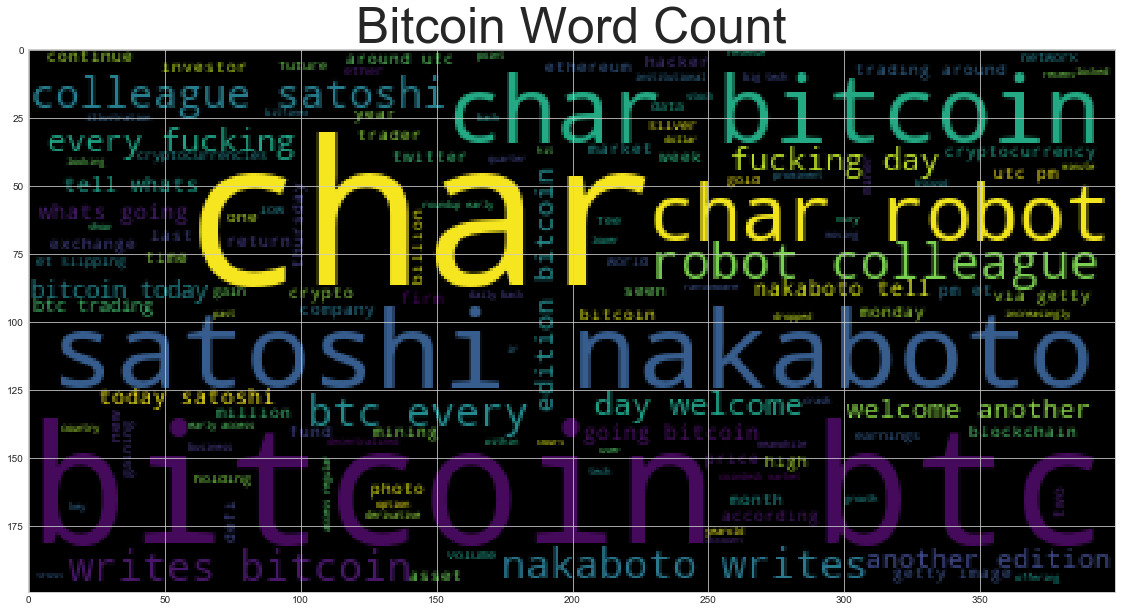

In [24]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!

# get string of words with spaces inbetween
bitcoin_wc = ' '.join(bitcoin_words)

# generate wordcloud with string of words
wc = WordCloud().generate(bitcoin_wc)

# set title fontsize and title text
plt_font_dict = {'fontsize': 50}
# {'fontsize': rcParams['axes.titlesize'],
#         'fontweight' : rcParams['axes.titleweight'],
#         'verticalalignment': 'baseline',
#         'horizontalalignment': loc}
plt.title('Bitcoin Word Count', fontdict=plt_font_dict)

plt.imshow(wc)

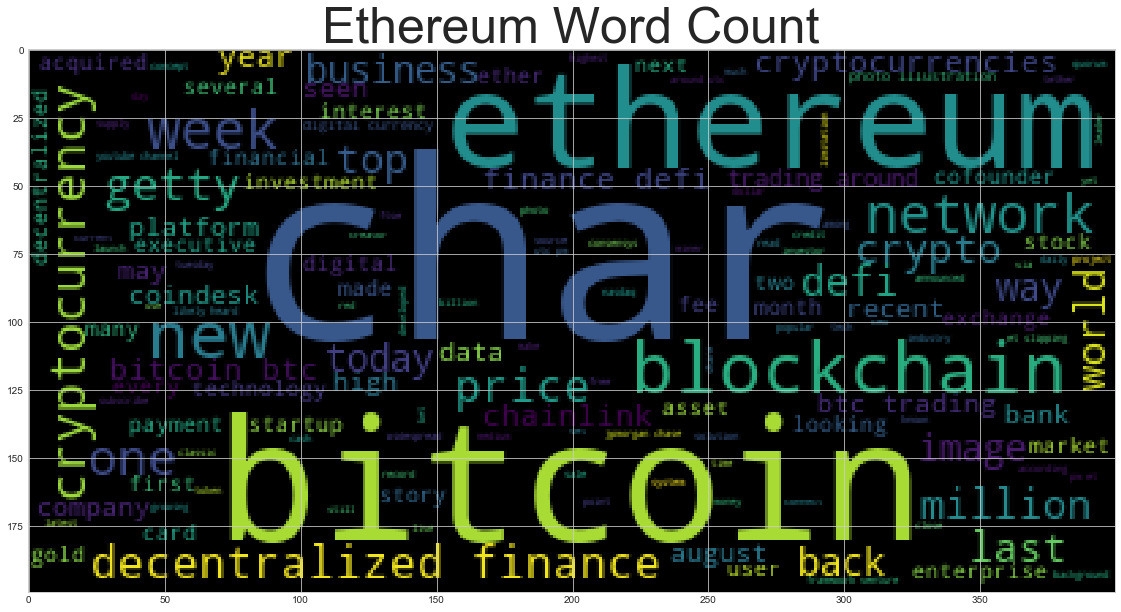

In [25]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!

# get string of words with spaces inbetween
ethereum_wc = ' '.join(ethereum_words)

# generate wordcloud with string of words
wc = WordCloud().generate(ethereum_wc)

# set title fontsize and title text
plt_font_dict = {'fontsize': 50}
plt.title('Ethereum Word Count', fontdict=plt_font_dict)

plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [29]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
bitcoin_all_content = ' '.join(bitcoin_df.text)
bitcoin_all_content

"A ransomware variant called NetWalker is doing surprisingly well, even in this economy. The malware, which takes computers hostage and asks for a Bitcoin ransom, raked in $25 million in the last five… [+1606 chars] HONG KONG/NEW YORK (Reuters) - Asian stocks inched up on Tuesday as Sino-U.S. tensions weighed on optimism generated by Wall Street’s tech-driven rally, while the dollar dropped against almost all ma… [+2054 chars] If you've been keeping up with tech news this week, you've likely heard about, or seen first-hand, how several YouTube channels have succumbed to a widespread cyberattack. Over the course of the last… [+16052 chars] An outspoken Bitcoin whale who rarely shows affection for anything other than BTC says two crypto assets have potential.\r\nThe pseudonymous trader known as Joe007 says UNUS SED LEO (LEO) may be a soli… [+1503 chars] Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I

In [30]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
bitcoin_doc = nlp(bitcoin_all_content)

# Add a title to the document
# YOUR CODE HERE!
bitcoin_doc.user_data["title"] = "Bitcoin NER"

In [31]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(bitcoin_doc, style='ent')

In [32]:
# List all Entities
# YOUR CODE HERE!

# simple removal of non-unique entity,label pairs (no case sensitivity)
unique_ents = []
for entity in bitcoin_doc.ents:
    if (entity.text,entity.label_) not in unique_ents:
        unique_ents.append((entity.text,entity.label_))

# list all entities and their types
for ent_pair in unique_ents:
    print(ent_pair[0] + ' ' + ent_pair[1])

NetWalker ORG
Bitcoin GPE
$25 million MONEY
the last five DATE
HONG KONG/NEW YORK GPE
Reuters ORG
Asian NORP
Tuesday DATE
Sino NORP
this week DATE
first ORDINAL
YouTube PRODUCT
BTC ORG
two CARDINAL
UNUS SED LEO ORG
LEO ORG
Satoshi Nakaboto ORG
Today DATE
Satoshi Nakaboto PERSON
Grayscale Bitcoin BTC Trust FAC
GBTC ORG
$1.5 billion MONEY
this year DATE
90% PERCENT
just six months DATE
Cryptocurrency ORG
Bitfinex PERSON
$400 million MONEY
$1.33 billion MONEY
Bitcoin BTCstolen FAC
2016 DATE
A Graph PERSON
Big Tech Media ORG
Twitter ORG
July 15 DATE
17-year-old DATE
Graham Ivan Clark PERSON
Tampa GPE
Florida GPE
22-year-old DATE
Orlando GPE
19-year-old DATE
The Pirate Bay LOC
More than seven years ago DATE
Litecoin PERSON
Moner PERSON
One CARDINAL
yesterday DATE
ICYMI ORG
45 CARDINAL
about a year DATE
2020 DATE
around $29 million MONEY
China GPE
$250m MONEY
U.S. GPE
280 CARDINAL
August 2016 DATE
nearly 120,000 CARDINAL
Bitfinex ORG
up to $400 million MONEY
Getty Images PERSON
HODLwave of B

---

## Ethereum NER

In [33]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
ethereum_all_content = ' '.join(ethereum_df.text)

ethereum_all_content

"TL;DR: The Mega Blockchain Mastery Bundle is on sale for £29.81 as of August 17, saving you 97% on list price.\r\nCash isn't necessarily king anymore. You've probably heard that cryptocurrency and bloc… [+1286 chars] LONDON (Reuters) - It sounds like a surefire bet. You lend money to a borrower who puts up collateral that exceeds the size of the loan, and then you earn interest of about 20%. What could possibly g… [+7143 chars] NEW YORK (Reuters) - Brooklyn-based technology startup ConsenSys has acquired JPMorgan Chase &amp; Co’s (JPM.N) marquee blockchain platform Quorum, the companies said on Tuesday. \r\nAs part of the dea… [+1915 chars] If you've been keeping up with tech news this week, you've likely heard about, or seen first-hand, how several YouTube channels have succumbed to a widespread cyberattack. Over the course of the last… [+16052 chars] REUTERS/Rick Wilking\r\n<ul><li>Michael Novogratz told Bloomberg the price of gold could certainly get up to $3,000.\xa0</li><li>The G

In [34]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
ethereum_doc = nlp(ethereum_all_content)

# Add a title to the document
# YOUR CODE HERE!
ethereum_doc.user_data["title"] = "Ethereum NER"

In [35]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(ethereum_doc, style='ent')

In [36]:
# List all Entities
# YOUR CODE HERE!

# simple removal of non-unique entity,label pairs (no case sensitivity)
unique_ents = []
for entity in ethereum_doc.ents:
    if (entity.text,entity.label_) not in unique_ents:
        unique_ents.append((entity.text,entity.label_))

# list all entities and their types
for ent_pair in unique_ents:
    print(ent_pair[0] + ' ' + ent_pair[1])

29.81 MONEY
August 17 DATE
97% PERCENT
LONDON GPE
Reuters ORG
about 20% PERCENT
NEW YORK PERSON
Brooklyn GPE
ConsenSys ORG
JPMorgan Chase &amp ORG
Quorum PRODUCT
Tuesday DATE
this week DATE
first ORDINAL
YouTube PRODUCT
Rick Wilking PERSON
ul><li PERSON
Michael Novogratz PERSON
Bloomberg PERSON
up to $3,000 MONEY
The Galaxy Digital ORG
Fed ORG
August DATE
4 DATE
2020 DATE
5 CARDINAL
Bitcoin GPE
BTC ORG
two CARDINAL
UNUS SED LEO ORG
LEO ORG
FTSE ORG
95 CARDINAL
6,016</li><li CARDINAL
Evraz GPE
Immedia ORG
100 CARDINAL
Creator Coin PERSON
Satoshi Nakaboto ORG
Today DATE
Satoshi Nakaboto PERSON
Knibbeler PERSON
'Current Studies' WORK_OF_ART
2013-2016 DATE
Last week DATE
Apple ORG
four CARDINAL
one CARDINAL
AAPL ORG
Robinhood ORG
about 700 million CARDINAL
monthly DATE
TikTok ORG
Generation Z. However PERSON
its days DATE
Hajime Sorayamas PERSON
Sexy ORG
$601.7 billion MONEY
only one CARDINAL
Monday DATE
500 CARDINAL
less than 1% PERCENT
3 p.m. EDT TIME
Ho PERSON
EBON PERSON
Friday DATE
JP